Conversion from .emd to .h5 format.

In [ ]:
# Conversion Function Definitions

from conversion_def import find_and_process_velox_files

In [ ]:
# Convert to HDF5
inputfolder_path= r""

find_and_process_velox_files(inputfolder_path)

Peakfinding using peakfinder8 from diffractem package. First open .h5 file in crystfel using .geom file that refers to correct mask file and find good peakfinding settings. Make sure there are enough friedel pairs for center beam finding and fitting. Don't put the mask in the same folder as the .h5 file since it is also .h5 format. If peakfinding has been run old data will be deleted.

In [9]:
# Peak Finder Function Definitions

from peakfinder_def import find_files_and_run_peakfinding

In [8]:
# Peak Finder
# inputfolder_path= r"/mnt/c/Users/bubl3932/Desktop/R2aOxC1"
inputfolder_path= r"/home/buster/wsl-TEST1"

# Peakfinder settings:
threshold = 80
min_snr = 3
min_pix_count = 2
max_pix_count = 200
local_bg_radius = 9
min_res = 0
max_res = 1000
x0 = 512
y0 = 512  

##### Enter parameters above #####

find_files_and_run_peakfinding(inputfolder_path, x0, y0, threshold, min_snr, min_pix_count, max_pix_count, local_bg_radius, min_res, max_res)

started processing R2aOx.h5
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
peak datasets already exist - deleting old data
new datasets created
0 frames processed
1000 frames processed
2000 frames processed
3000 frames processed
4000 frames processed
5000 frames processed
6000 frames processed
7000 frames processed
8000 frames processed
9000 frames processed
10000 frames processed
11000 frames processed
12000 frames processed
13000 frames processed
14000 frames processed
15000 frames processed
(15415, 500)
finished processing R2aOx.h5


Find the center beam spot center on all frames using friedel pairs and  interpolation.

In [11]:
# Find Center Beam Spot Center Function Definitions

from centerfinding_def import find_files_and_run_centerfinding

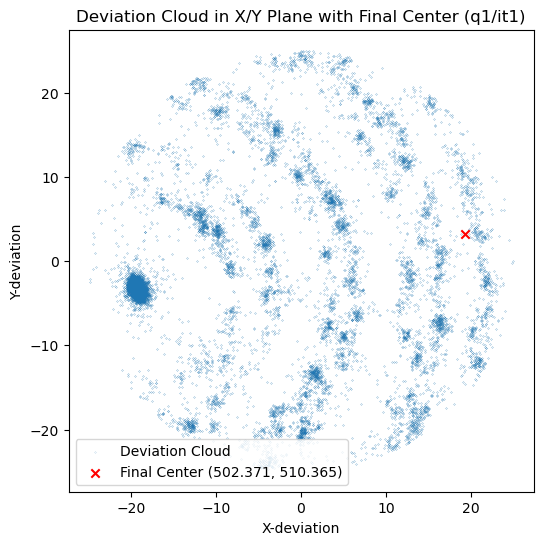

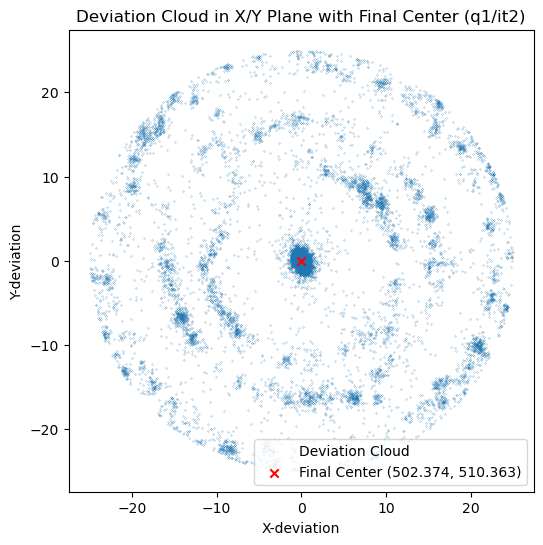

Quarter 1 processed in 1 iterations, final center = [502.374, 510.363], mean deviation = [6.082e-03,3.243e-03]


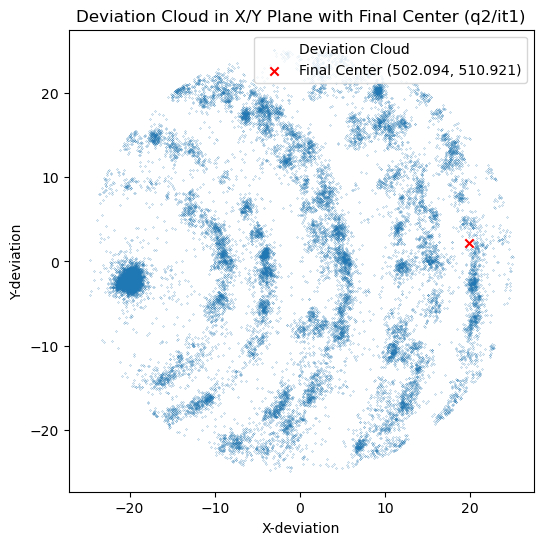

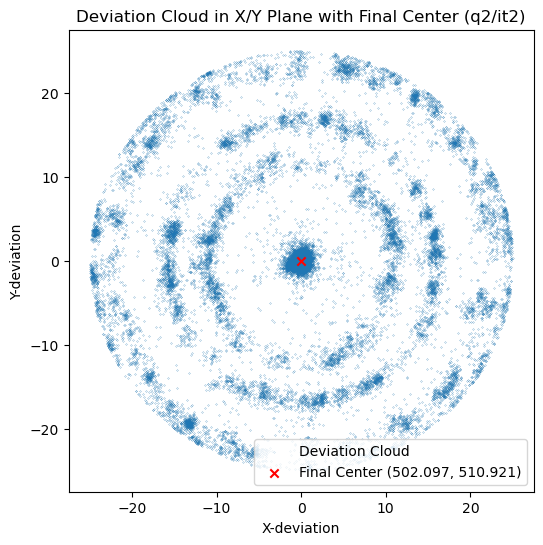

Quarter 2 processed in 1 iterations, final center = [502.097, 510.921], mean deviation = [5.572e-03,1.201e-03]


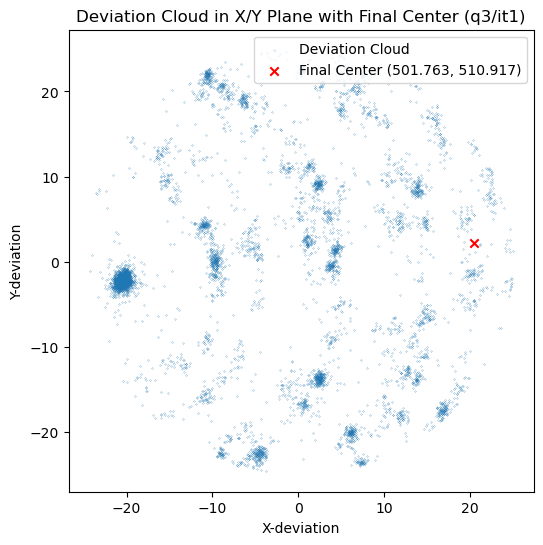

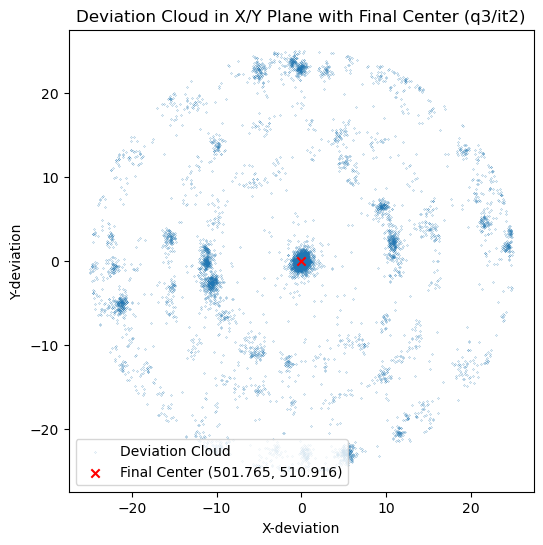

Quarter 3 processed in 1 iterations, final center = [501.765, 510.916], mean deviation = [4.222e-03,8.469e-04]
No cluster in deviation cloud found (4/001).


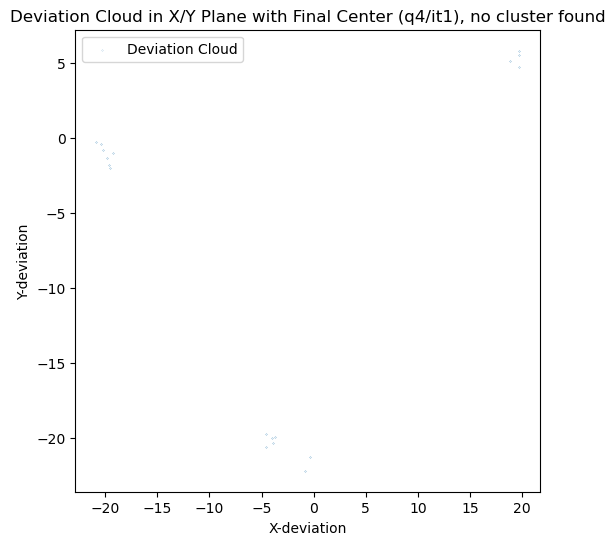

Quarter 4 processed in 0 iterations, final center = [512, 512], mean deviation = [inf,inf]
Interpolating centers based on linear fit
Scope of drift: 11.421 px in x, 1.963 px in y
Interpolated detector shifts written to HDF5 file


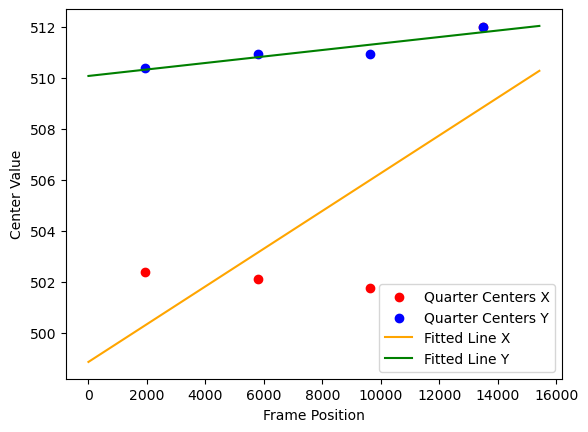

In [12]:
# Find Center Beam Spot Center
tolerance = 25 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 30 # Minimum number of peaks in a frame to be considered
resolution_limit = 150 # Maximum resultuion of peaks to be considered
min_samples_fraction = 0.05  # Fraction of datapoints in the largest cluster to be accepted
x0 = 512
y0 = 512

inputfolder_path= r"/home/buster/wsl-TEST1"

##### Enter parameters above #####

find_files_and_run_centerfinding(inputfolder_path, x0, y0, tolerance, min_peaks, resolution_limit, min_samples_fraction)

Lets improve the center beam center with a LOWESS fit

In [13]:
# Center Beam Drift Refinement Function Definitions

from centerrefinement_def import find_files_and_run_centerrefinement


Working with R2aOx.h5


/home/buster/anaconda3/envs/diffractem_env/lib/python3.10/site-packages/scipy/interpolate/_interpolate.py:701: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


plotting LOWESS fit


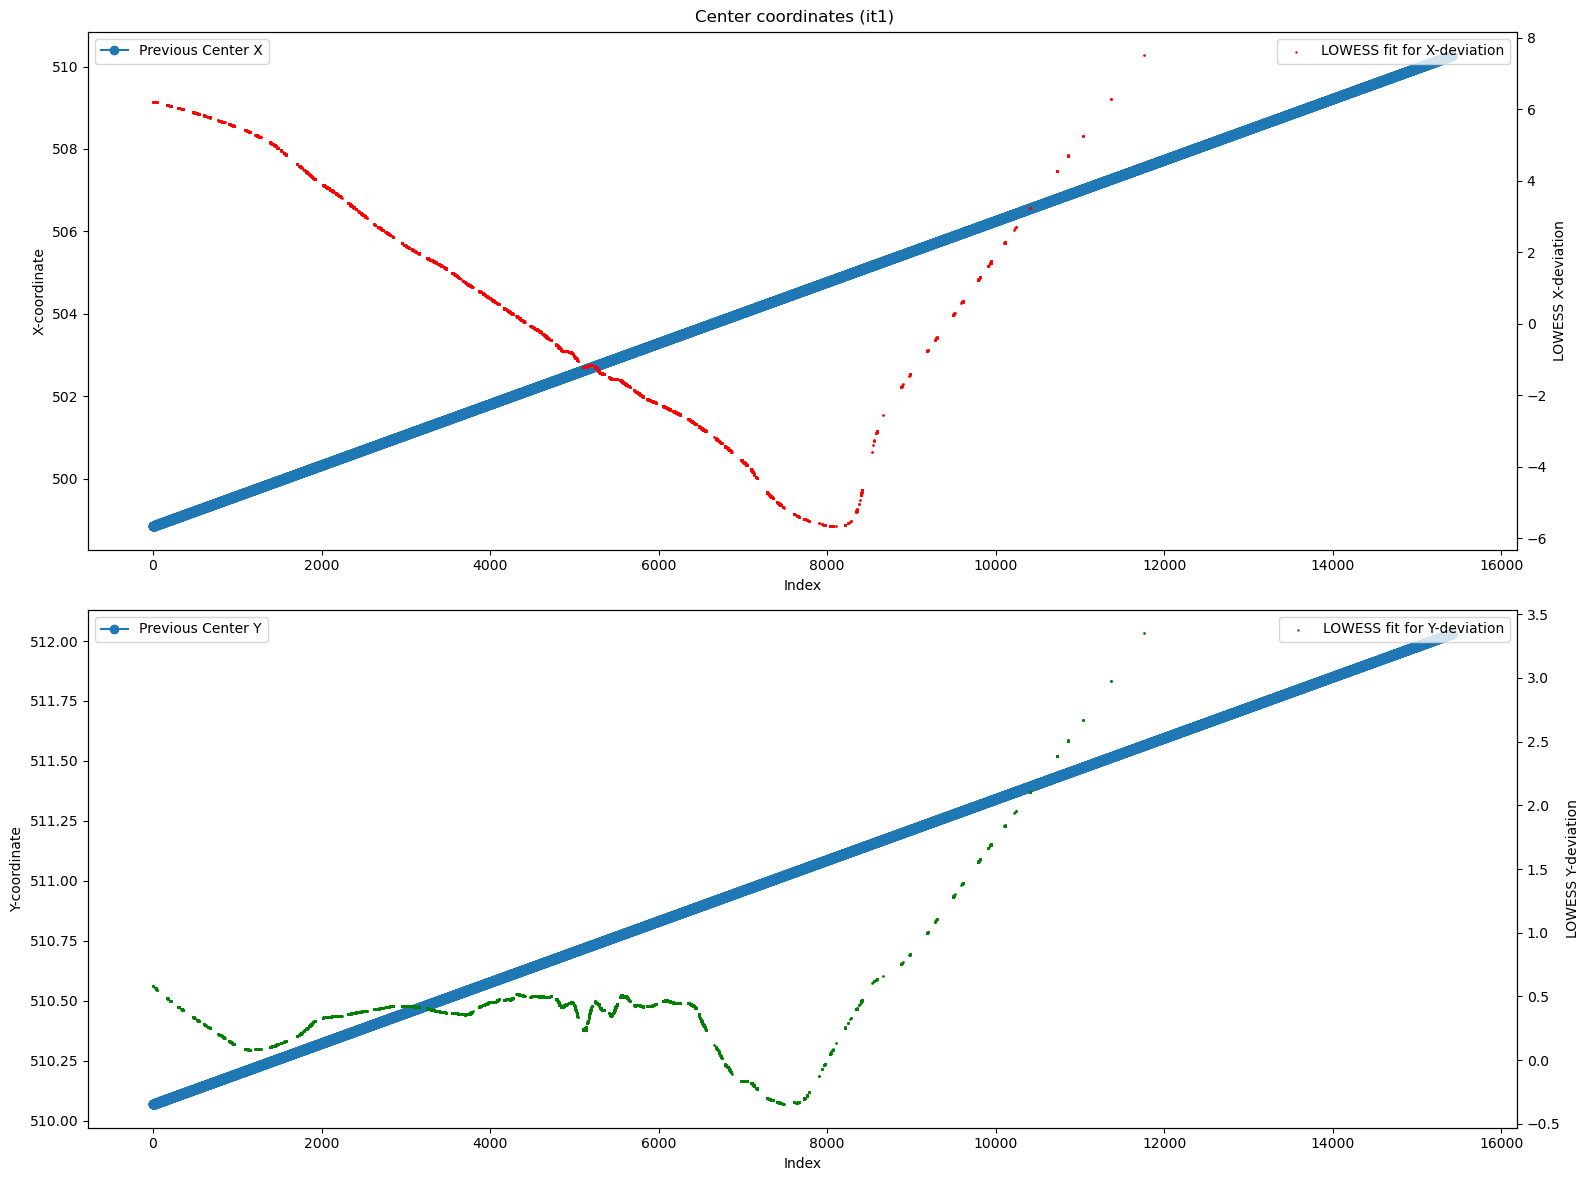

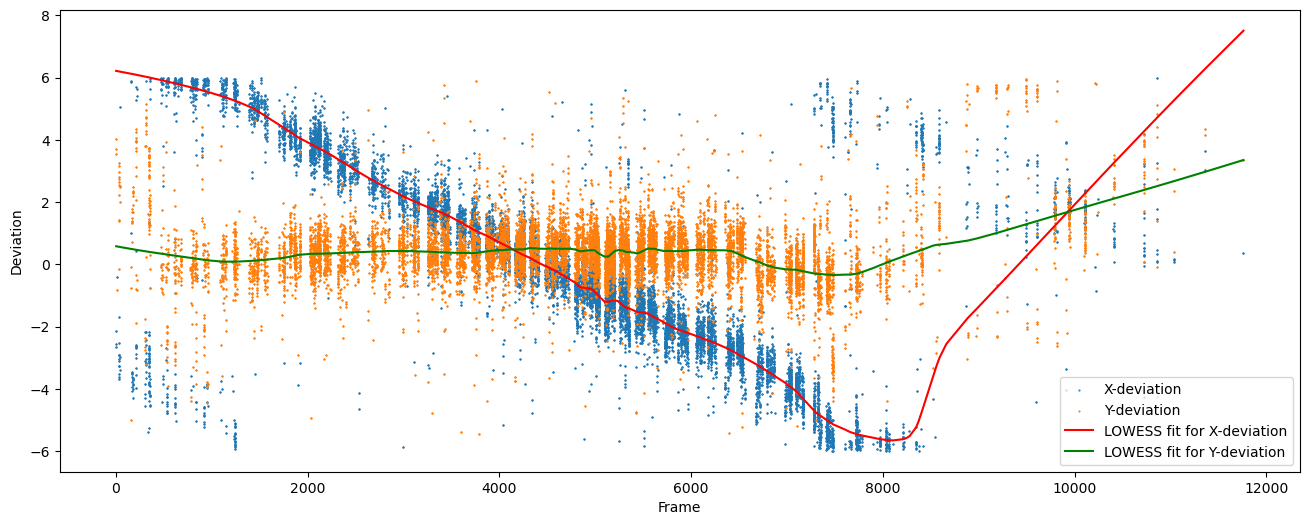

plotting LOWESS fit


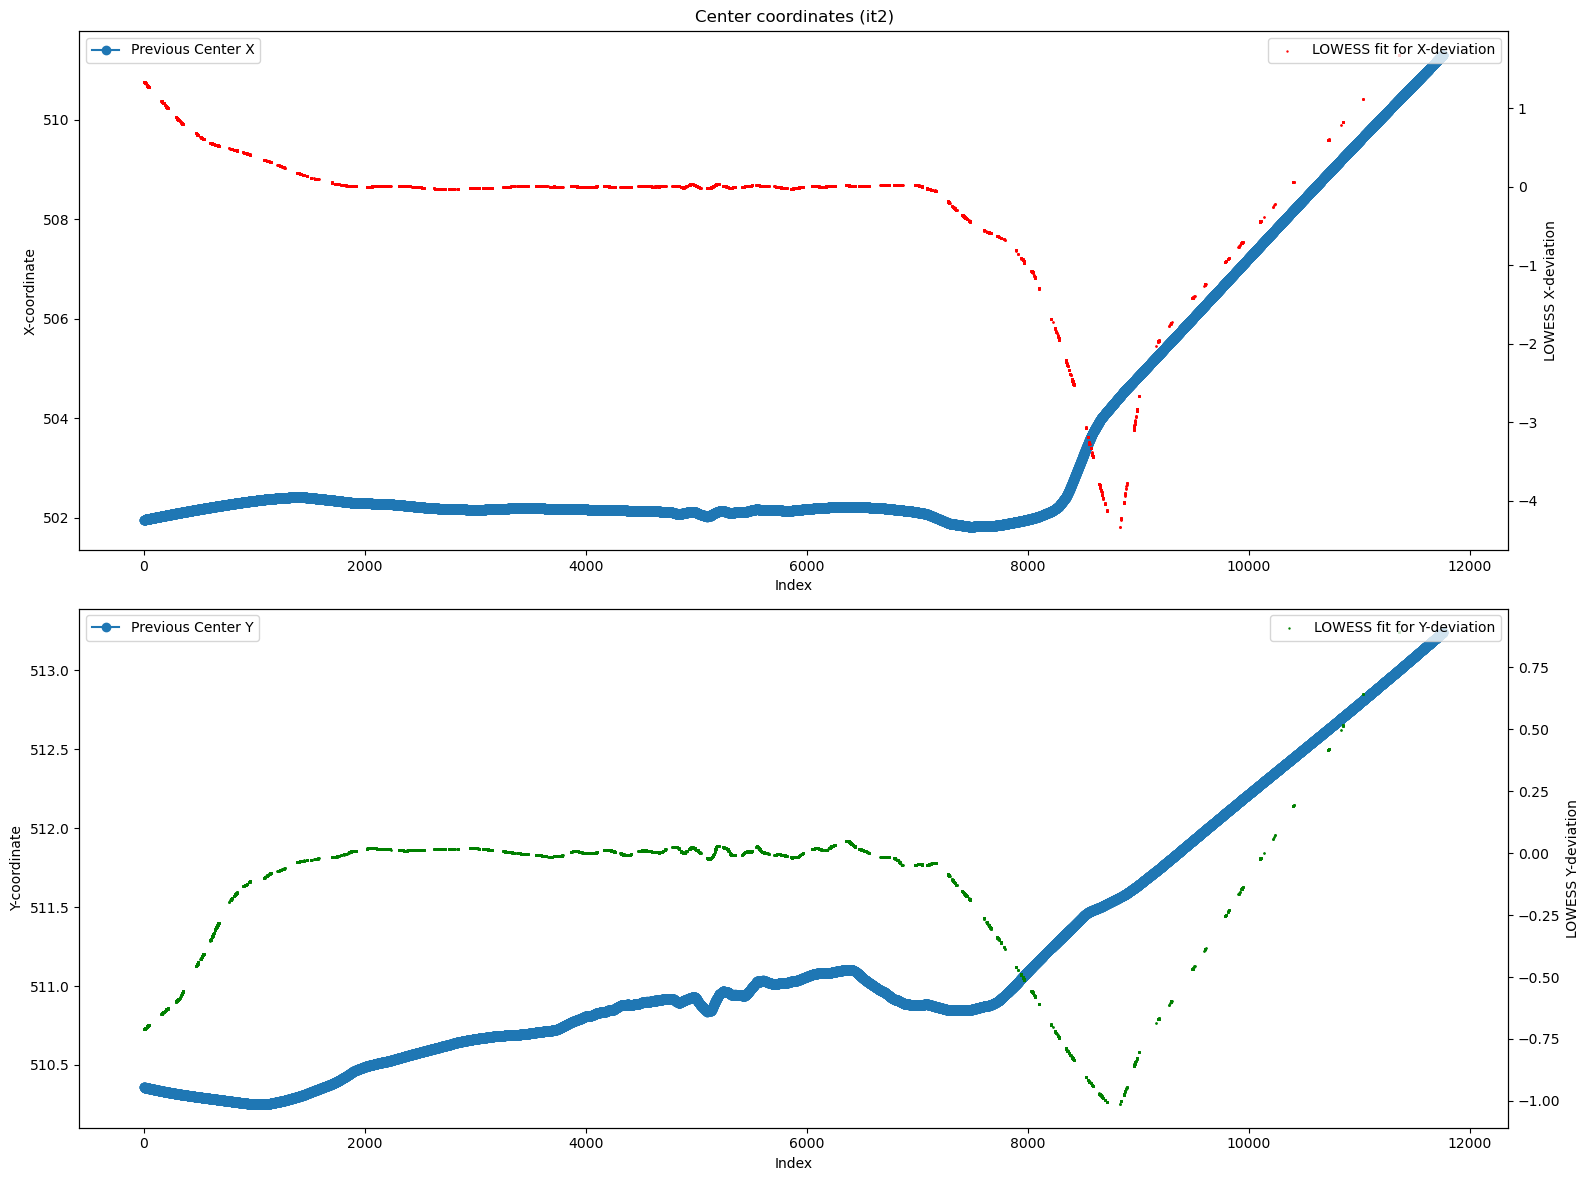

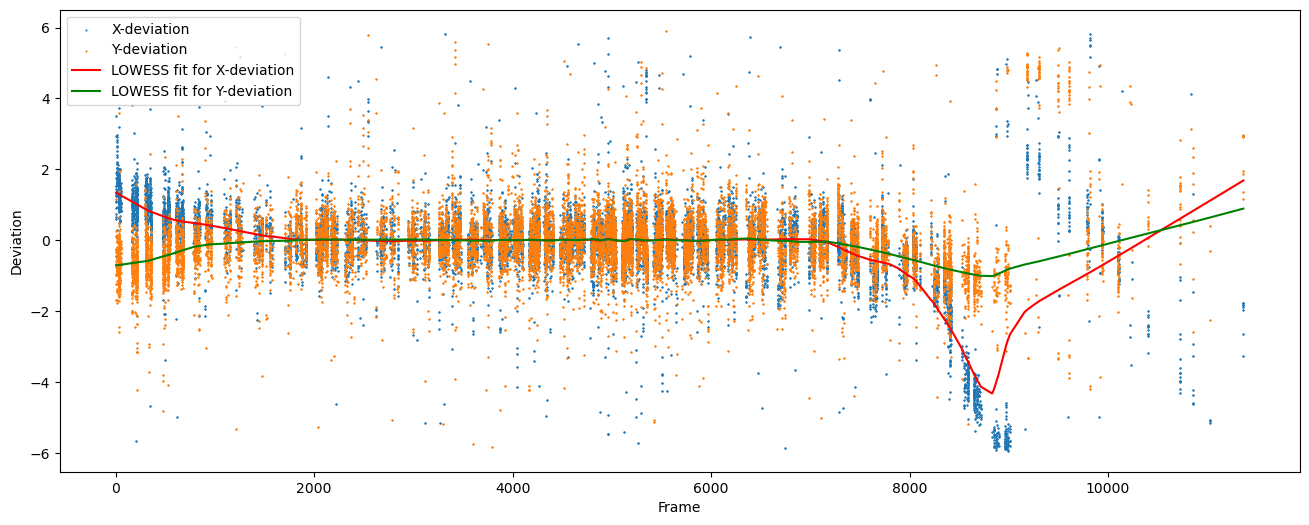

plotting LOWESS fit


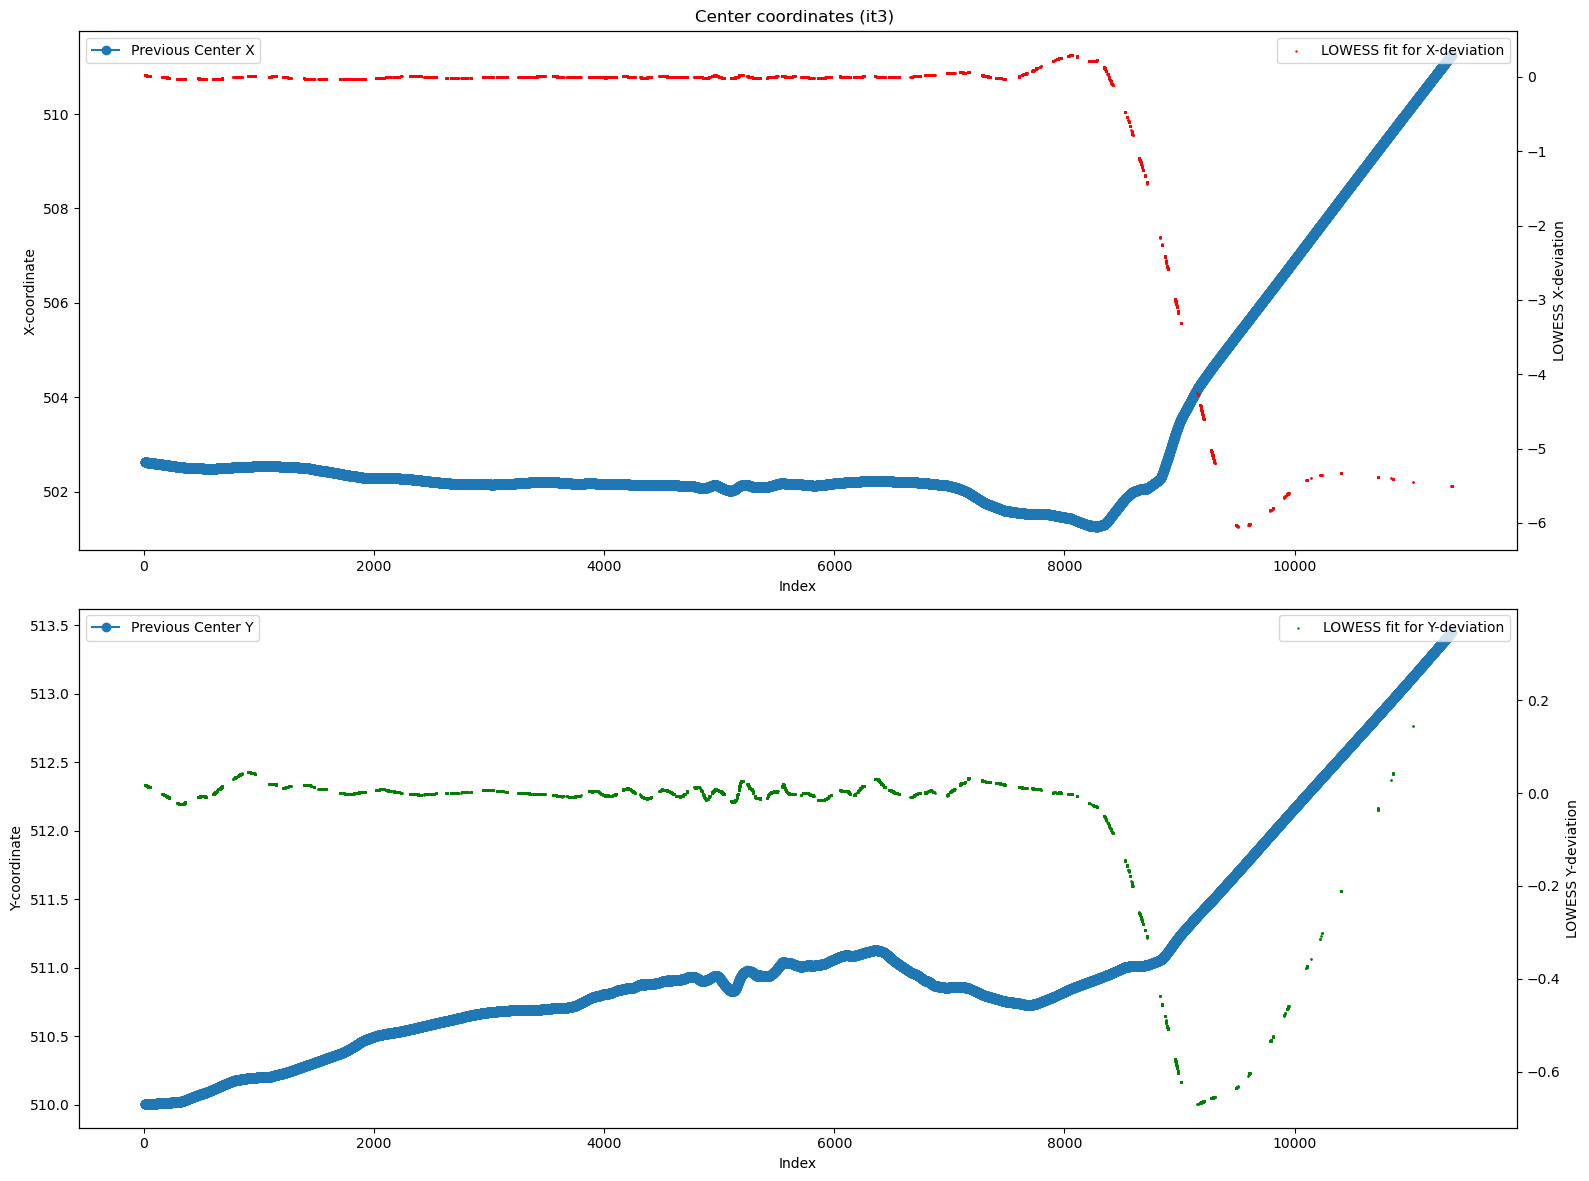

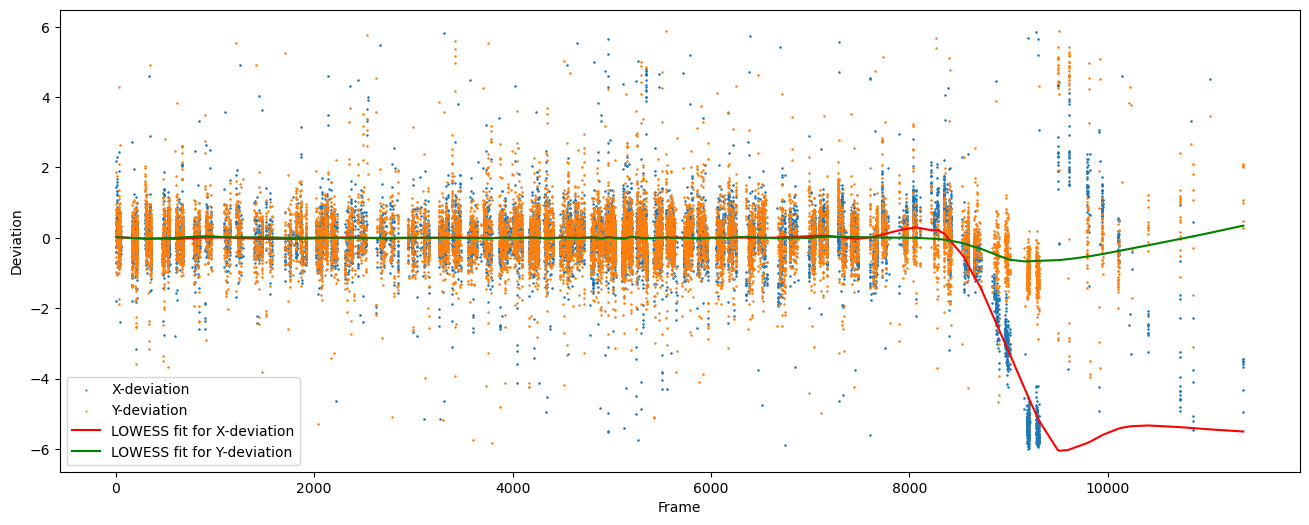

plotting LOWESS fit


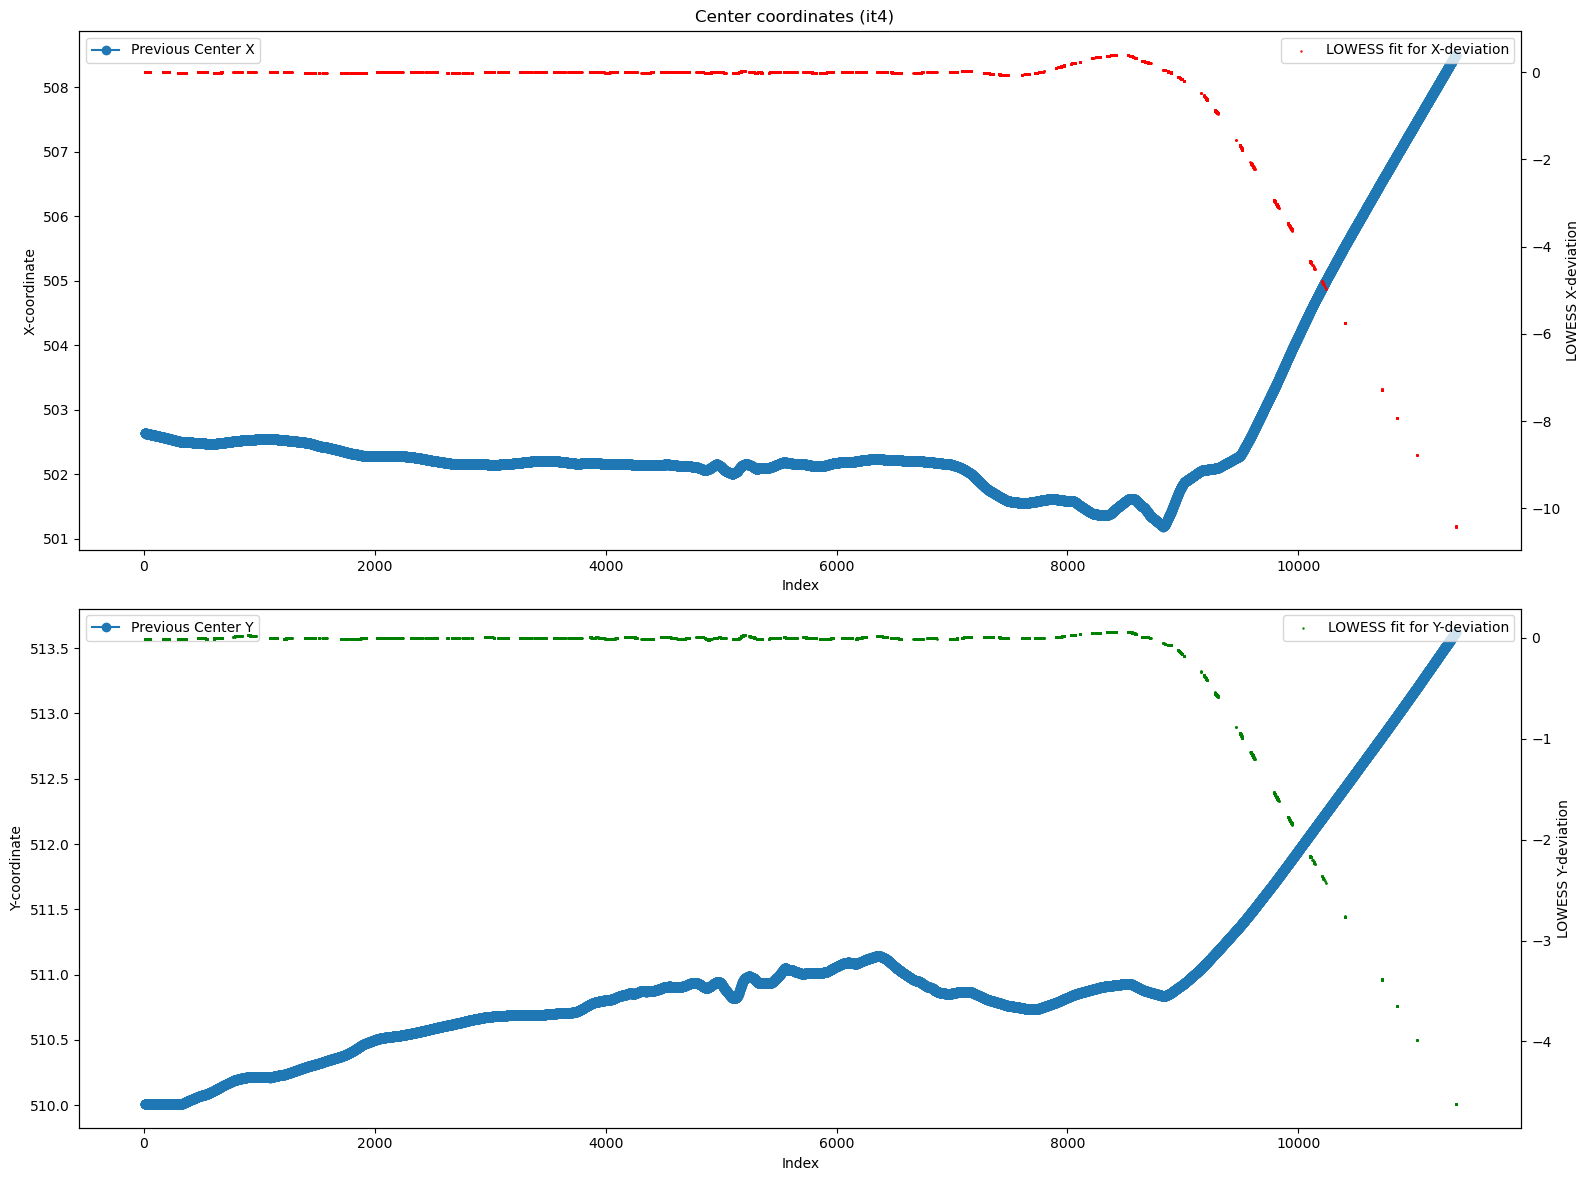

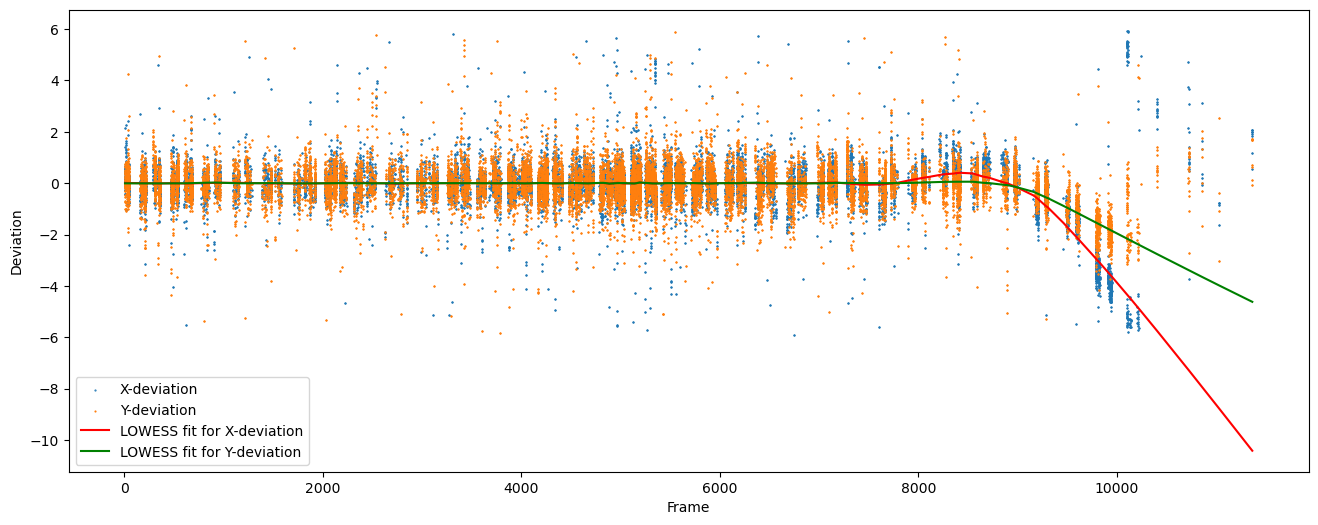

plotting LOWESS fit


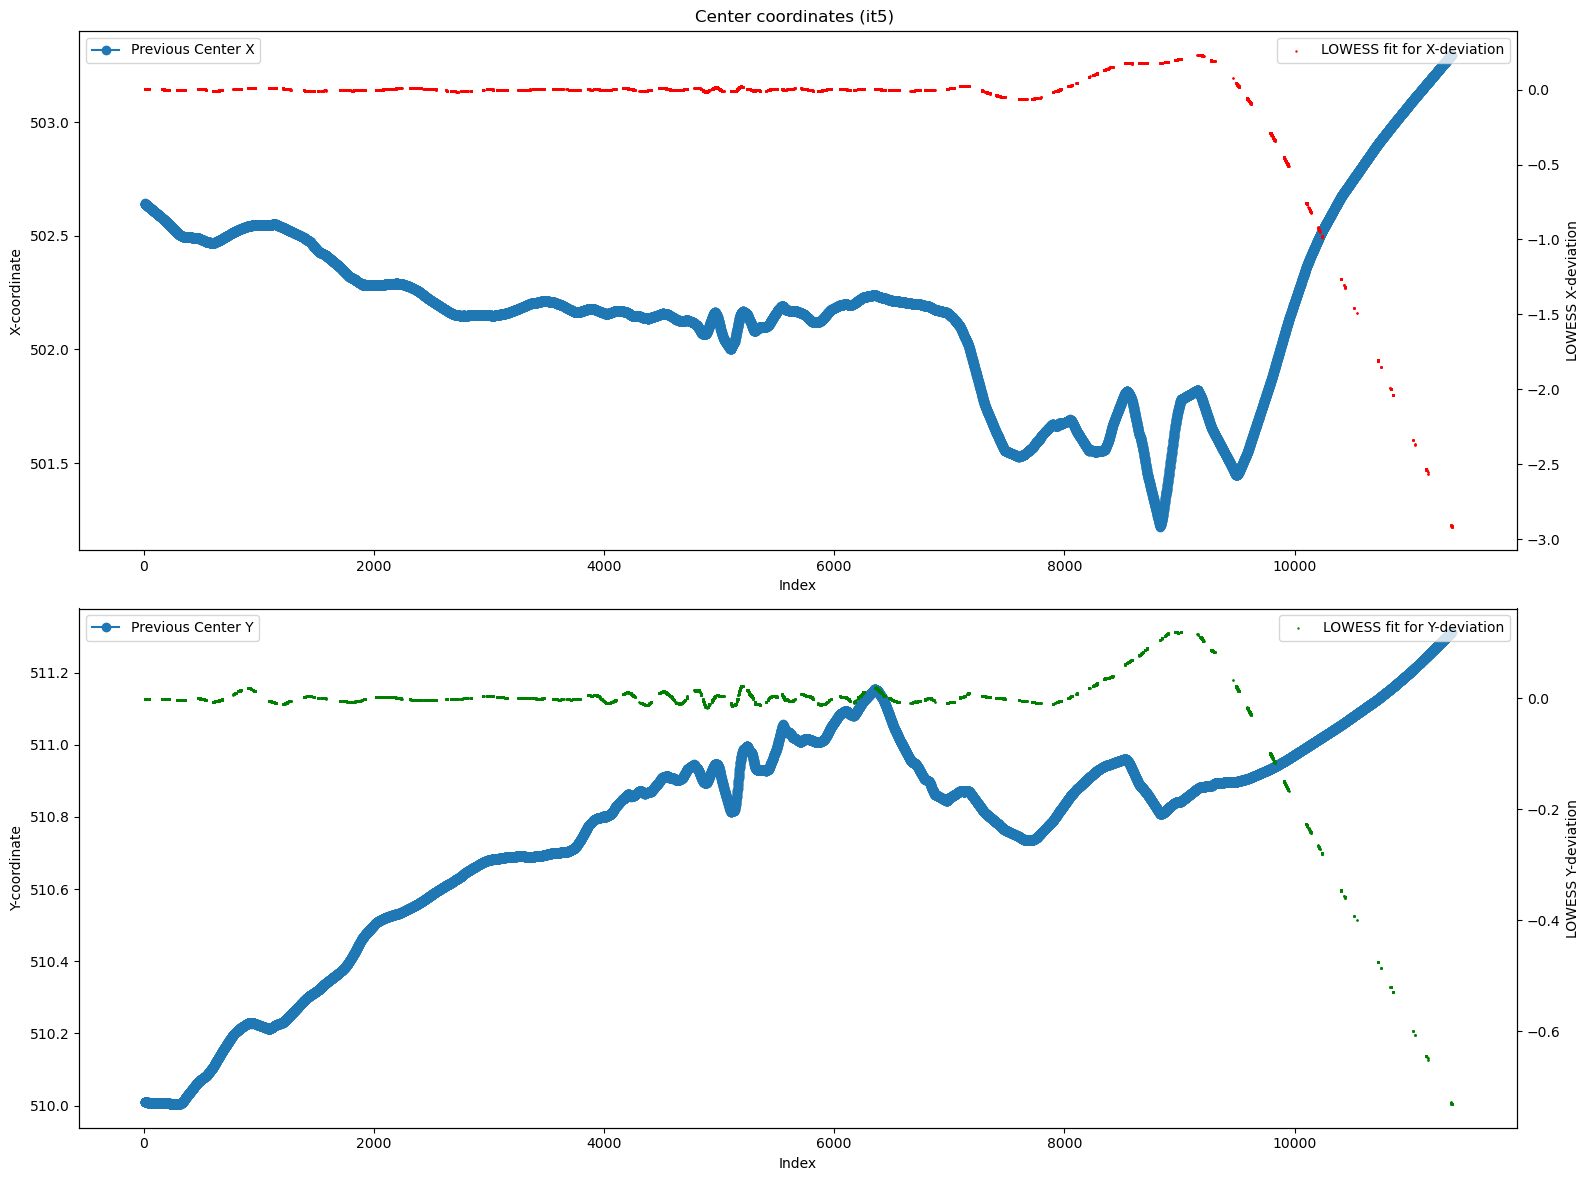

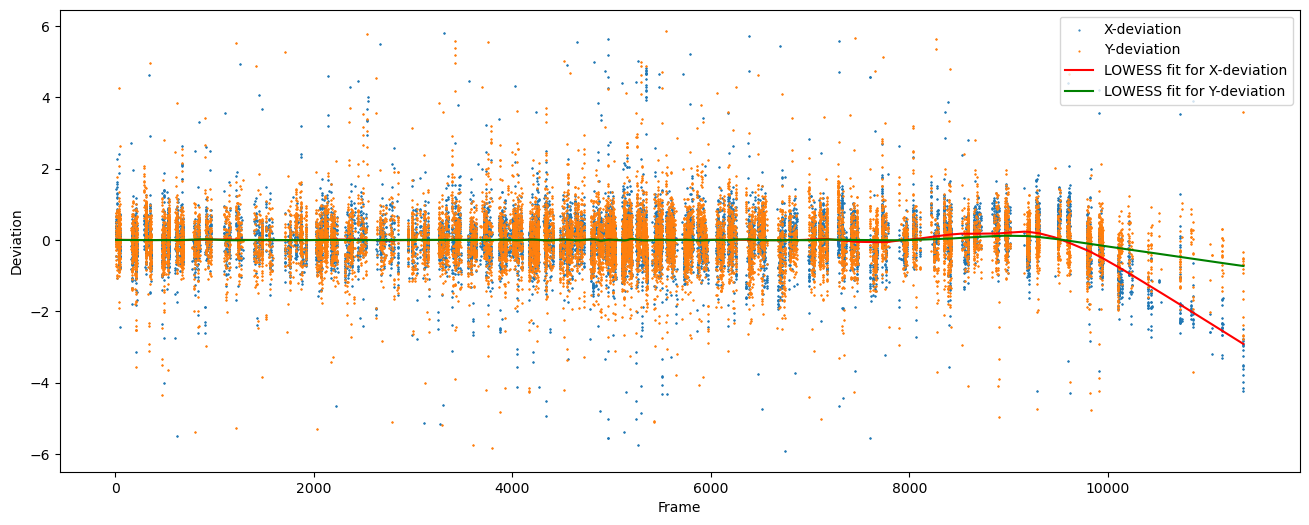

plotting LOWESS fit


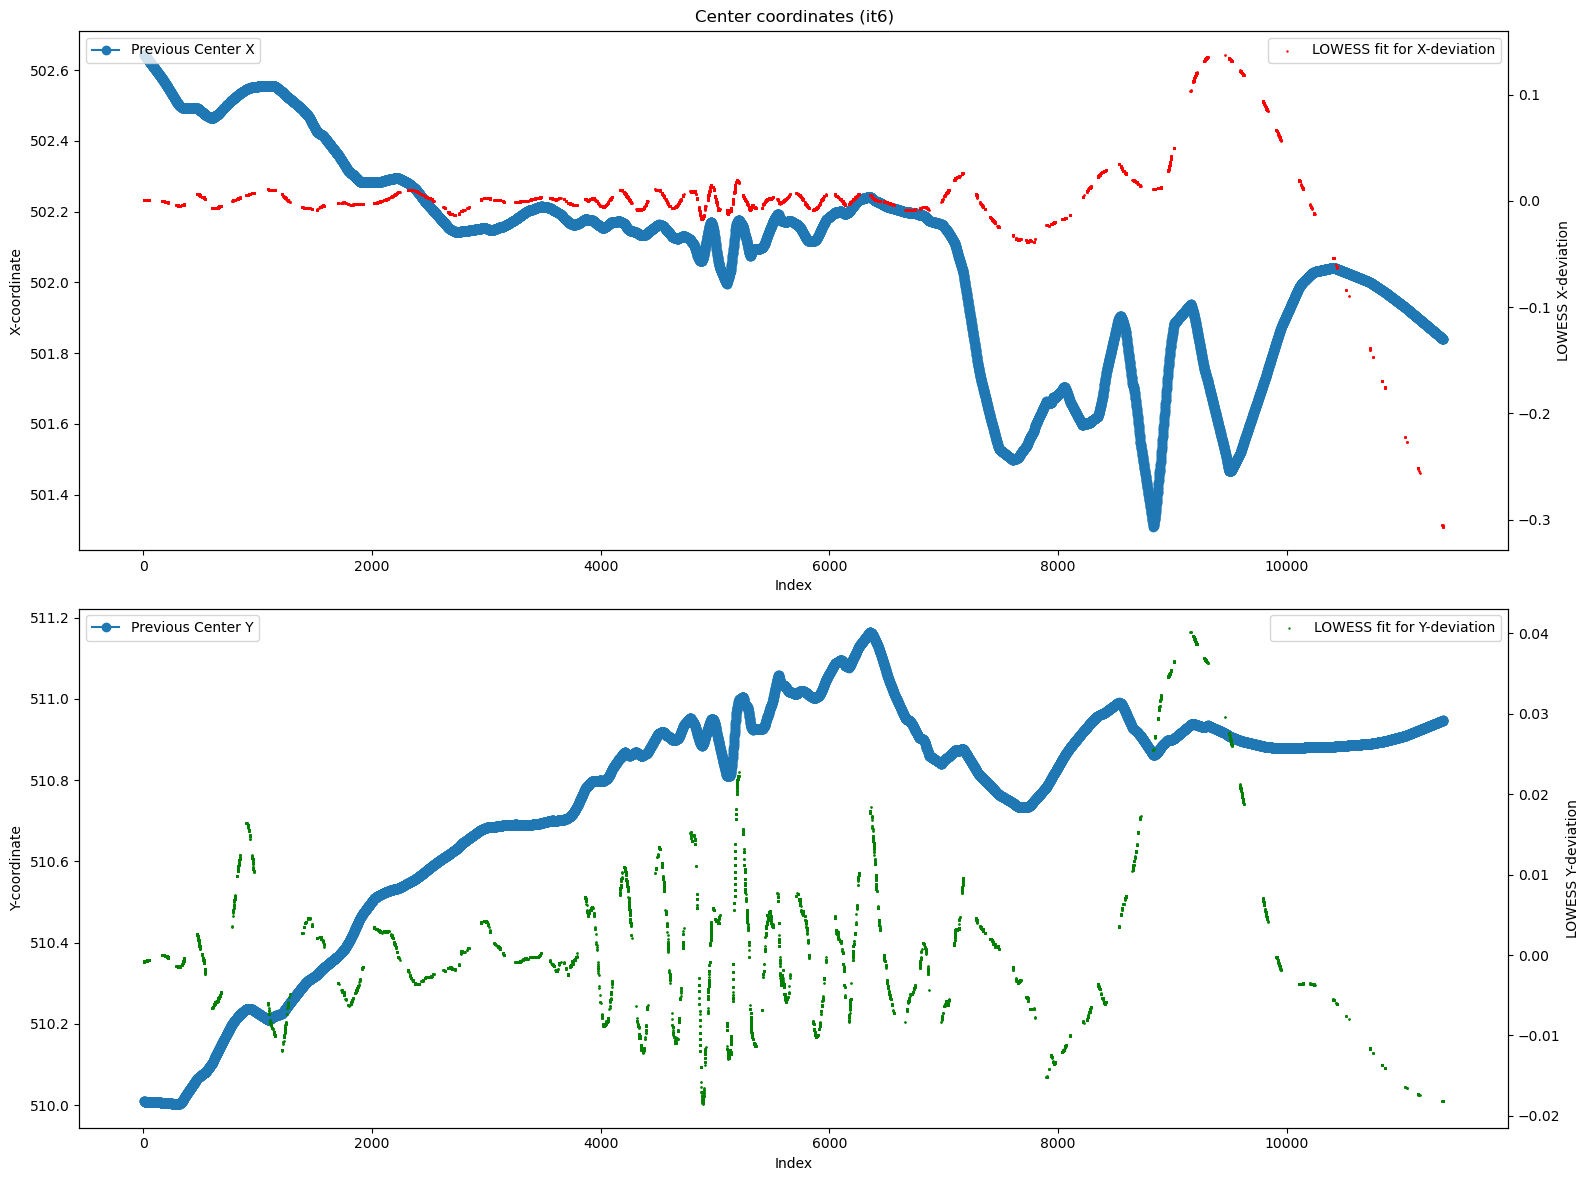

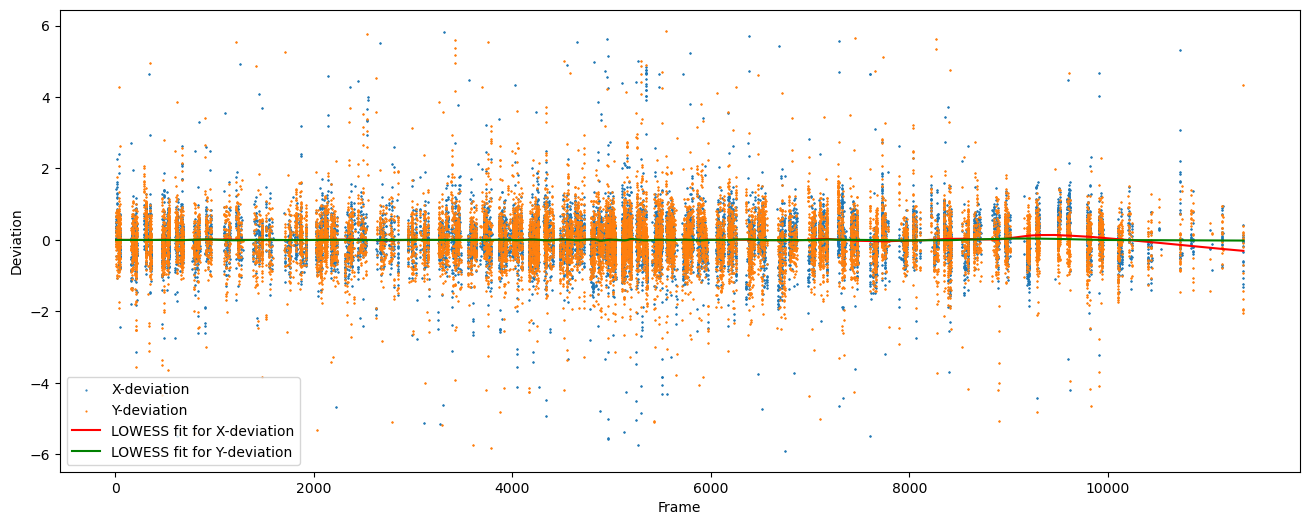

plotting LOWESS fit


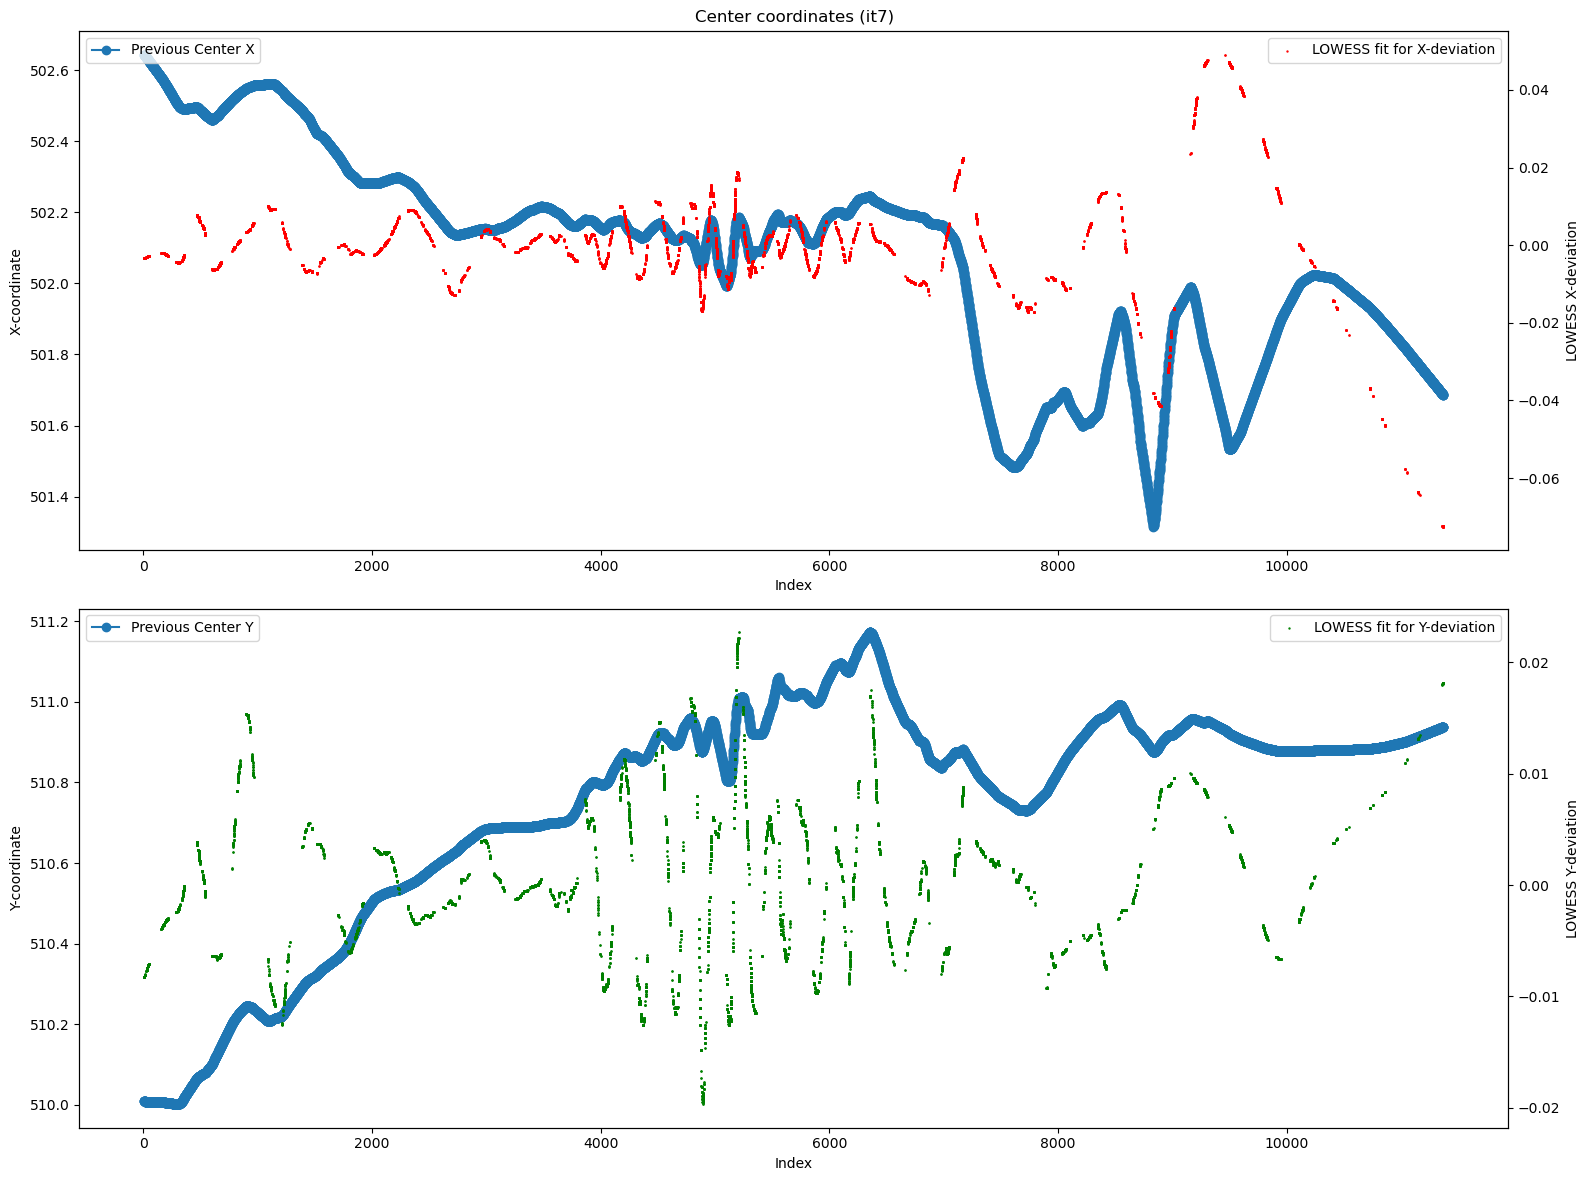

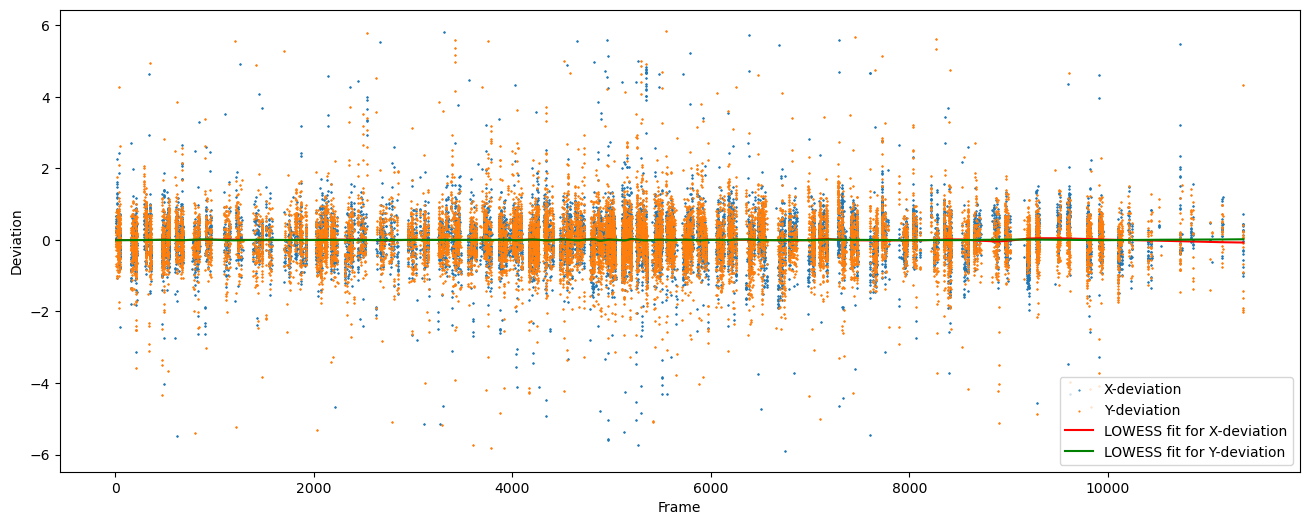

plotting LOWESS fit


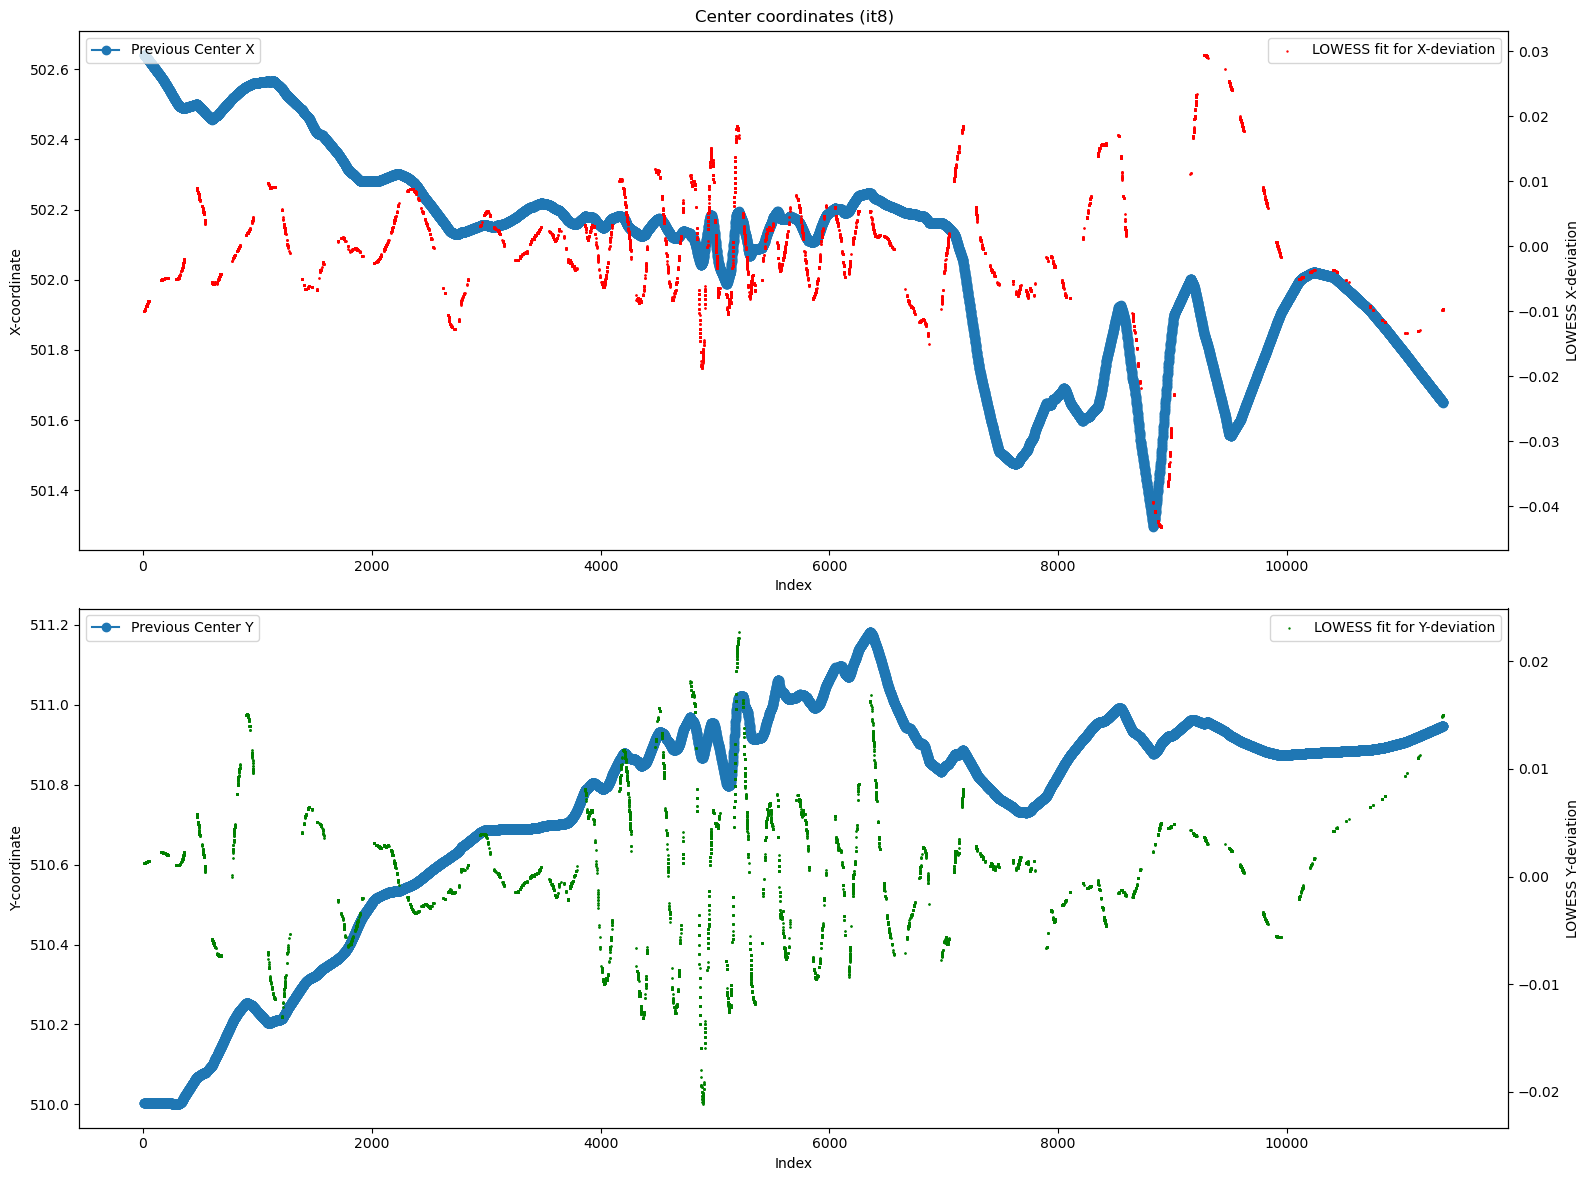

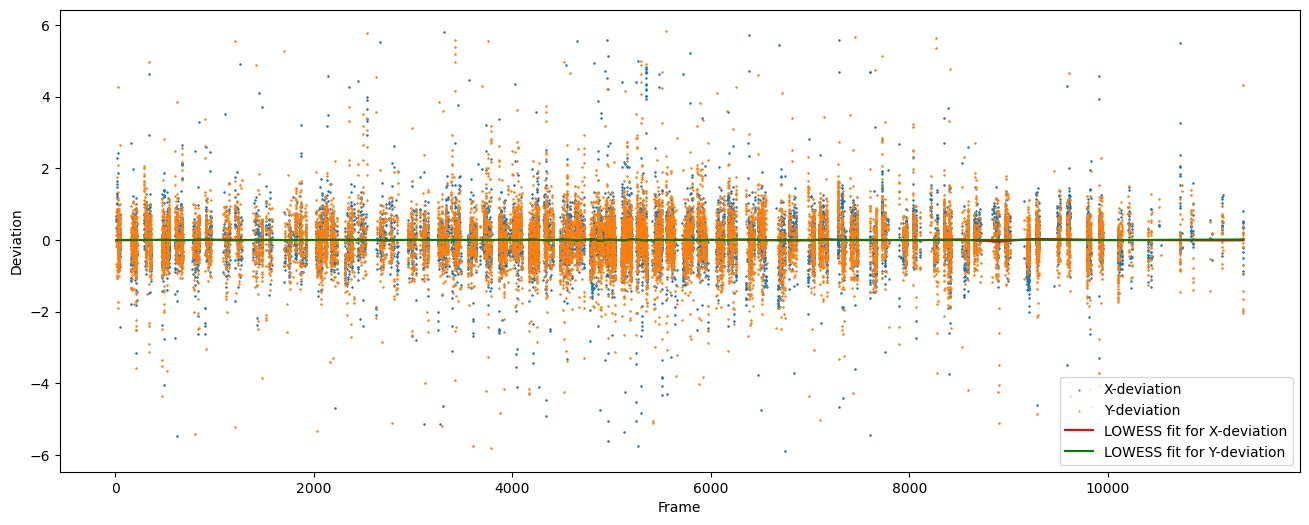

Convergence criterion (deviation from LOWESS < 0.05) met after 8 iteration(s)
Updated detector shifts written to HDF5 file


In [14]:
# Center Beam Drift Refinement
tolerance = 6 # If you know that your beam center is close to the center of the detector you can reduce the tolerance to reduce the processing time
min_peaks = 30 # Minimum number of peaks in frame to be used for refinement
resolution_limit = 150 # Maximum resolution of peaks to be considered for refinement
max_iterations = 10 # Maximum number of iterations for refinement
convergence_threshold = 0.05 # Refinement is stopped when the deviation of the LOWESS fit does not exceed the threshold (given in pixels)

inputfolder_path= r"/home/buster/wsl-TEST1"

##### Enter your parameters above #####

find_files_and_run_centerrefinement(inputfolder_path, tolerance, min_peaks, resolution_limit, max_iterations, convergence_threshold)

And now to find the indexing using xGandalf (5x5=25 output streams)

In [15]:
# Indexing Function Definitions

from indexing_def import gandalf_iterator

In [16]:
# Indexing (To speed up process make sure output stream is in wsl folder)
geomfile_path = r"/home/buster/wsl-TEST1/R2aOx.geom"
cellfile_path = r"/home/buster/wsl-TEST1/R2aOx.cell"
input_path = r"/home/buster/wsl-TEST1"
output_file_base = "R2aOx"

num_threads = 23
indexing_method = "xgandalf"
resolution_push = 0
integration_method = "rings"
int_radius = "4,5,8"
min_peaks = 15
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_min_vector_length = 40
xgandalf_max_vector_length = 110
xgandalf_iterations = 1
tolerance = "5,5,5,5"

##### Enter your parameters above #####

gandalf_iterator(geomfile_path, cellfile_path, input_path, output_file_base, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_min_vector_length, xgandalf_max_vector_length, xgandalf_iterations, tolerance)

Running for initial x=-512, y=-512


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
193 images processed, 96 hits (49.7%), 7 indexable (7.3% of hits, 3.6% overall), 7 crystals, 37.9 images/sec.
472 images processed, 212 hits (44.9%), 27 indexable (12.7% of hits, 5.7% overall), 29 crystals, 55.6 images/sec.
632 images processed, 313 hits (49.5%), 42 indexable (13.4% of hits, 6.6% overall), 44 crystals, 32.0 images/sec.
835 images processed, 428 hits (51.3%), 62 indexable (14.5% of hits, 7.4% overall), 67 crystals, 40.2 imag

Running for x=-512.01, y=-512.01


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
196 images processed, 99 hits (50.5%), 7 indexable (7.1% of hits, 3.6% overall), 7 crystals, 38.2 images/sec.
471 images processed, 211 hits (44.8%), 16 indexable (7.6% of hits, 3.4% overall), 18 crystals, 51.6 images/sec.
629 images processed, 310 hits (49.3%), 29 indexable (9.4% of hits, 4.6% overall), 35 crystals, 31.6 images/sec.
827 images processed, 424 hits (51.3%), 53 indexable (12.5% of hits, 6.4% overall), 61 crystals, 39.2 images/sec.
1131 images processed, 572 hits (50.6%), 64 indexable (11.2% of hits, 5.7% overall), 72 crystals, 60.6 images/sec.
1396 images processed, 726 hits (52.0%), 84 indexable (

Running for x=-512.01, y=-512.0


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
198 images processed, 101 hits (51.0%), 5 indexable (5.0% of hits, 2.5% overall), 5 crystals, 38.1 images/sec.
471 images processed, 211 hits (44.8%), 18 indexable (8.5% of hits, 3.8% overall), 19 crystals, 51.0 images/sec.
622 images processed, 303 hits (48.7%), 42 indexable (13.9% of hits, 6.8% overall), 48 crystals, 30.2 images/sec.
827 images processed, 424 hits (51.3%), 61 indexable (14.4% of hits, 7.4% overall), 68 crystals, 40.5 imag

Running for x=-512.01, y=-511.99


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
197 images processed, 100 hits (50.8%), 5 indexable (5.0% of hits, 2.5% overall), 5 crystals, 39.0 images/sec.
470 images processed, 210 hits (44.7%), 20 indexable (9.5% of hits, 4.3% overall), 22 crystals, 51.8 images/sec.
628 images processed, 309 hits (49.2%), 32 indexable (10.4% of hits, 5.1% overall), 34 crystals, 31.3 images/sec.
825 images processed, 422 hits (51.2%), 54 indexable (12.8% of hits, 6.5% overall), 57 crystals, 38.0 imag

Running for x=-512.0, y=-512.01


197 images processed, 100 hits (50.8%), 8 indexable (8.0% of hits, 4.1% overall), 9 crystals, 39.4 images/sec.
471 images processed, 211 hits (44.8%), 17 indexable (8.1% of hits, 3.6% overall), 18 crystals, 52.7 images/sec.
624 images processed, 305 hits (48.9%), 32 indexable (10.5% of hits, 5.1% overall), 34 crystals, 30.6 images/sec.
823 images processed, 420 hits (51.0%), 55 indexable (13.1% of hits, 6.7% overall), 57 crystals, 39.4 images/sec.
1117 images processed, 558 hits (50.0%), 73 indexable (13.1% of hits, 6.5% overall), 75 crystals, 58.6 images/sec.
1381 images processed, 711 hits (51.5%), 90 indexable (12.7% of hits, 6.5% overall), 95 crystals, 52.6 images/sec.
1646 images processed, 894 hits (54.3%), 112 indexable (12.5% of hits, 6.8% overall), 120 crystals, 52.9 images/sec.
1877 images processed, 1052 hits (56.0%), 130 indexable (12.4% of hits, 6.9% overall), 140 crystals, 45.8 images/sec.
2112 images processed, 1183 hits (56.0%), 143 indexable (12.1% of hits, 6.8% overal

Running for x=-512.0, y=-511.99


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
197 images processed, 100 hits (50.8%), 7 indexable (7.0% of hits, 3.6% overall), 8 crystals, 39.2 images/sec.
468 images processed, 208 hits (44.4%), 17 indexable (8.2% of hits, 3.6% overall), 18 crystals, 52.3 images/sec.
623 images processed, 304 hits (48.8%), 39 indexable (12.8% of hits, 6.3% overall), 41 crystals, 30.6 images/sec.
828 images processed, 425 hits (51.3%), 57 indexable (13.4% of hits, 6.9% overall), 60 crystals, 39.4 images/sec.
1138 images processed, 578 hits (50.8%), 77 indexable (13.3% of hits, 6.8% overall), 80 crystals, 61.7 images/sec.
1405 images processed, 735 hits (52.3%), 90 indexable

Running for x=-511.99, y=-512.01


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
204 images processed, 104 hits (51.0%), 6 indexable (5.8% of hits, 2.9% overall), 6 crystals, 40.1 images/sec.
470 images processed, 210 hits (44.7%), 14 indexable (6.7% of hits, 3.0% overall), 15 crystals, 50.4 images/sec.
627 images processed, 308 hits (49.1%), 34 indexable (11.0% of hits, 5.4% overall), 38 crystals, 31.4 images/sec.
827 images processed, 424 hits (51.3%), 55 indexable (13.0% of hits, 6.7% overall), 61 crystals, 38.8 images/sec.
1123 images processed, 564 hits (50.2%), 74 indexable (13.1% of hits, 6.6% overall), 81 crystals, 58.3 images/sec.
1382 images processed, 712 hits (51.5%), 92 indexable

Running for x=-511.99, y=-512.0


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
197 images processed, 100 hits (50.8%), 7 indexable (7.0% of hits, 3.6% overall), 7 crystals, 38.7 images/sec.
469 images processed, 209 hits (44.6%), 20 indexable (9.6% of hits, 4.3% overall), 20 crystals, 51.1 images/sec.
627 images processed, 308 hits (49.1%), 41 indexable (13.3% of hits, 6.5% overall), 43 crystals, 31.6 images/sec.
822 images processed, 419 hits (51.0%), 66 indexable (15.8% of hits, 8.0% overall), 69 crystals, 38.6 images/sec.
1105 images processed, 546 hits (49.4%), 79 indexable (14.5% of hits, 7.1% overall), 83 crystals, 56.6 images/sec.
1332 images processed, 704 hits (52.9%), 97 indexable

Running for x=-511.99, y=-511.99


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
198 images processed, 101 hits (51.0%), 5 indexable (5.0% of hits, 2.5% overall), 5 crystals, 39.1 images/sec.
469 images processed, 209 hits (44.6%), 17 indexable (8.1% of hits, 3.6% overall), 17 crystals, 53.7 images/sec.
619 images processed, 300 hits (48.5%), 38 indexable (12.7% of hits, 6.1% overall), 40 crystals, 29.9 images/sec.
819 images processed, 416 hits (50.8%), 54 indexable (13.0% of hits, 6.6% overall), 59 crystals, 40.0 imag

Running for x=-512.02, y=-512.02


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
197 images processed, 100 hits (50.8%), 10 indexable (10.0% of hits, 5.1% overall), 11 crystals, 39.1 images/sec.
432 images processed, 196 hits (45.4%), 23 indexable (11.7% of hits, 5.3% overall), 25 crystals, 46.9 images/sec.
610 images processed, 291 hits (47.7%), 42 indexable (14.4% of hits, 6.9% overall), 45 crystals, 35.5 images/sec.
789 images processed, 386 hits (48.9%), 66 indexable (17.1% of hits, 8.4% overall), 70 crystals, 35.7 

Running for x=-512.02, y=-512.01


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
199 images processed, 102 hits (51.3%), 6 indexable (5.9% of hits, 3.0% overall), 6 crystals, 39.7 images/sec.
472 images processed, 212 hits (44.9%), 18 indexable (8.5% of hits, 3.8% overall), 20 crystals, 52.2 images/sec.
628 images processed, 309 hits (49.2%), 33 indexable (10.7% of hits, 5.3% overall), 38 crystals, 31.1 images/sec.
826 images processed, 423 hits (51.2%), 62 indexable (14.7% of hits, 7.5% overall), 68 crystals, 39.5 imag

Running for x=-512.02, y=-512.0


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
196 images processed, 99 hits (50.5%), 7 indexable (7.1% of hits, 3.6% overall), 8 crystals, 38.5 images/sec.
471 images processed, 211 hits (44.8%), 17 indexable (8.1% of hits, 3.6% overall), 18 crystals, 50.8 images/sec.
644 images processed, 325 hits (50.5%), 31 indexable (9.5% of hits, 4.8% overall), 34 crystals, 34.3 images/sec.
847 images processed, 427 hits (50.4%), 47 indexable (11.0% of hits, 5.5% overall), 52 crystals, 40.6 images

Running for x=-512.02, y=-511.99


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
194 images processed, 97 hits (50.0%), 9 indexable (9.3% of hits, 4.6% overall), 10 crystals, 38.6 images/sec.
469 images processed, 209 hits (44.6%), 22 indexable (10.5% of hits, 4.7% overall), 24 crystals, 54.9 images/sec.
616 images processed, 297 hits (48.2%), 37 indexable (12.5% of hits, 6.0% overall), 41 crystals, 28.4 images/sec.
809 images processed, 406 hits (50.2%), 56 indexable (13.8% of hits, 6.9% overall), 61 crystals, 38.6 images/sec.
1100 images processed, 541 hits (49.2%), 76 indexable (14.0% of hits, 6.9% overall), 84 crystals, 58.0 images/sec.
1321 images processed, 703 hits (53.2%), 90 indexabl

Running for x=-512.02, y=-511.98


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
196 images processed, 99 hits (50.5%), 10 indexable (10.1% of hits, 5.1% overall), 10 crystals, 39.0 images/sec.
471 images processed, 211 hits (44.8%), 23 indexable (10.9% of hits, 4.9% overall), 24 crystals, 51.9 images/sec.
624 images processed, 305 hits (48.9%), 42 indexable (13.8% of hits, 6.7% overall), 45 crystals, 30.4 images/sec.
823 images processed, 420 hits (51.0%), 62 indexable (14.8% of hits, 7.5% overall), 67 crystals, 39.7 i

Running for x=-512.01, y=-512.02


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
197 images processed, 100 hits (50.8%), 9 indexable (9.0% of hits, 4.6% overall), 9 crystals, 39.0 images/sec.
469 images processed, 209 hits (44.6%), 18 indexable (8.6% of hits, 3.8% overall), 19 crystals, 53.6 images/sec.
617 images processed, 298 hits (48.3%), 35 indexable (11.7% of hits, 5.7% overall), 39 crystals, 29.1 images/sec.
823 images processed, 420 hits (51.0%), 59 indexable (14.0% of hits, 7.2% overall), 64 crystals, 41.0 imag

Running for x=-512.01, y=-511.98


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
193 images processed, 96 hits (49.7%), 12 indexable (12.5% of hits, 6.2% overall), 12 crystals, 38.5 images/sec.
465 images processed, 205 hits (44.1%), 30 indexable (14.6% of hits, 6.5% overall), 35 crystals, 54.3 images/sec.
613 images processed, 294 hits (48.0%), 46 indexable (15.6% of hits, 7.5% overall), 54 crystals, 27.6 images/sec.
829 images processed, 426 hits (51.4%), 61 indexable (14.3% of hits, 7.4% overall), 69 crystals, 42.2 images/sec.
1131 images processed, 572 hits (50.6%), 71 indexable (12.4% of hits, 6.3% overall), 79 crystals, 60.3 images/sec.
1403 images processed, 733 hits (52.2%), 88 indexa

Running for x=-512.0, y=-512.02


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
198 images processed, 101 hits (51.0%), 5 indexable (5.0% of hits, 2.5% overall), 5 crystals, 38.9 images/sec.
471 images processed, 211 hits (44.8%), 16 indexable (7.6% of hits, 3.4% overall), 16 crystals, 51.8 images/sec.
632 images processed, 313 hits (49.5%), 38 indexable (12.1% of hits, 6.0% overall), 38 crystals, 32.1 images/sec.
828 images processed, 425 hits (51.3%), 66 indexable (15.5% of hits, 8.0% overall), 67 crystals, 38.5 images/sec.
1122 images processed, 563 hits (50.2%), 88 indexable (15.6% of hits, 7.8% overall), 94 crystals, 58.7 images/sec.
1392 images processed, 722 hits (51.9%), 105 indexabl

Running for x=-512.0, y=-511.98


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
193 images processed, 96 hits (49.7%), 11 indexable (11.5% of hits, 5.7% overall), 12 crystals, 38.5 images/sec.
465 images processed, 205 hits (44.1%), 24 indexable (11.7% of hits, 5.2% overall), 30 crystals, 53.6 images/sec.
609 images processed, 290 hits (47.6%), 43 indexable (14.8% of hits, 7.1% overall), 54 crystals, 28.6 images/sec.
813 images processed, 410 hits (50.4%), 61 indexable (14.9% of hits, 7.5% overall), 73 crystals, 40.7 images/sec.
1104 images processed, 545 hits (49.4%), 76 indexable (13.9% of hits, 6.9% overall), 90 crystals, 57.9 images/sec.
1377 images processed, 707 hits (51.3%), 89 indexa

Running for x=-511.99, y=-512.02


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
194 images processed, 97 hits (50.0%), 7 indexable (7.2% of hits, 3.6% overall), 8 crystals, 38.8 images/sec.
470 images processed, 210 hits (44.7%), 23 indexable (11.0% of hits, 4.9% overall), 27 crystals, 50.4 images/sec.
619 images processed, 300 hits (48.5%), 44 indexable (14.7% of hits, 7.1% overall), 59 crystals, 29.4 images/sec.
827 images processed, 424 hits (51.3%), 62 indexable (14.6% of hits, 7.5% overall), 78 crystals, 39.4 images/sec.
1129 images processed, 570 hits (50.5%), 84 indexable (14.7% of hits, 7.4% overall), 102 crystals, 60.3 images/sec.
1394 images processed, 724 hits (51.9%), 107 indexab

Running for x=-511.99, y=-511.98


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
196 images processed, 99 hits (50.5%), 6 indexable (6.1% of hits, 3.1% overall), 6 crystals, 39.0 images/sec.
471 images processed, 211 hits (44.8%), 22 indexable (10.4% of hits, 4.7% overall), 25 crystals, 53.9 images/sec.
622 images processed, 303 hits (48.7%), 34 indexable (11.2% of hits, 5.5% overall), 39 crystals, 30.2 images/sec.
828 images processed, 425 hits (51.3%), 54 indexable (12.7% of hits, 6.5% overall), 60 crystals, 40.0 images/sec.
1131 images processed, 572 hits (50.6%), 73 indexable (12.8% of hits, 6.5% overall), 80 crystals, 59.8 images/sec.
1406 images processed, 736 hits (52.3%), 89 indexable

Running for x=-511.98, y=-512.02


195 images processed, 98 hits (50.3%), 8 indexable (8.2% of hits, 4.1% overall), 8 crystals, 38.4 images/sec.
469 images processed, 209 hits (44.6%), 24 indexable (11.5% of hits, 5.1% overall), 25 crystals, 52.9 images/sec.
620 images processed, 301 hits (48.5%), 42 indexable (14.0% of hits, 6.8% overall), 44 crystals, 30.2 images/sec.
829 images processed, 426 hits (51.4%), 62 indexable (14.6% of hits, 7.5% overall), 68 crystals, 40.8 images/sec.
1131 images processed, 572 hits (50.6%), 77 indexable (13.5% of hits, 6.8% overall), 83 crystals, 60.3 images/sec.
1392 images processed, 722 hits (51.9%), 96 indexable (13.3% of hits, 6.9% overall), 106 crystals, 51.7 images/sec.
1699 images processed, 908 hits (53.4%), 119 indexable (13.1% of hits, 7.0% overall), 131 crystals, 61.4 images/sec.
1898 images processed, 1069 hits (56.3%), 139 indexable (13.0% of hits, 7.3% overall), 152 crystals, 39.5 images/sec.
2120 images processed, 1191 hits (56.2%), 152 indexable (12.8% of hits, 7.2% overa

Running for x=-511.98, y=-512.01


This is what I understood your unit cell to be:
orthorhombic P, right handed.
a      b      c            alpha   beta  gamma
 74.62  77.24 144.81 A     90.00  90.00  90.00 deg
List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
198 images processed, 101 hits (51.0%), 6 indexable (5.9% of hits, 3.0% overall), 6 crystals, 39.3 images/sec.
468 images processed, 208 hits (44.4%), 17 indexable (8.2% of hits, 3.6% overall), 18 crystals, 51.6 images/sec.
622 images processed, 303 hits (48.7%), 40 indexable (13.2% of hits, 6.4% overall), 42 crystals, 30.7 images/sec.
829 images processed, 426 hits (51.4%), 60 indexable (14.1% of hits, 7.2% overall), 63 crystals, 39.9 imag

Running for x=-511.98, y=-512.0


195 images processed, 98 hits (50.3%), 5 indexable (5.1% of hits, 2.6% overall), 6 crystals, 37.6 images/sec.
471 images processed, 211 hits (44.8%), 24 indexable (11.4% of hits, 5.1% overall), 27 crystals, 51.1 images/sec.
634 images processed, 315 hits (49.7%), 40 indexable (12.7% of hits, 6.3% overall), 45 crystals, 32.4 images/sec.
828 images processed, 425 hits (51.3%), 60 indexable (14.1% of hits, 7.2% overall), 67 crystals, 38.2 images/sec.
1130 images processed, 571 hits (50.5%), 77 indexable (13.5% of hits, 6.8% overall), 85 crystals, 59.9 images/sec.
1404 images processed, 734 hits (52.3%), 96 indexable (13.1% of hits, 6.8% overall), 105 crystals, 54.8 images/sec.
1715 images processed, 924 hits (53.9%), 115 indexable (12.4% of hits, 6.7% overall), 124 crystals, 62.2 images/sec.
2002 images processed, 1090 hits (54.4%), 124 indexable (11.4% of hits, 6.2% overall), 134 crystals, 57.3 images/sec.
2164 images processed, 1225 hits (56.6%), 133 indexable (10.9% of hits, 6.1% overa

Running for x=-511.98, y=-511.99


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
194 images processed, 97 hits (50.0%), 8 indexable (8.2% of hits, 4.1% overall), 8 crystals, 38.8 images/sec.
471 images processed, 211 hits (44.8%), 19 indexable (9.0% of hits, 4.0% overall), 19 crystals, 53.7 images/sec.
628 images processed, 309 hits (49.2%), 40 indexable (12.9% of hits, 6.4% overall), 41 crystals, 31.2 images/sec.
828 images processed, 425 hits (51.3%), 63 indexable (14.8% of hits, 7.6% overall), 64 crystals, 38.5 images/sec.
1137 images processed, 577 hits (50.7%), 79 indexable (13.7% of hits, 6.9% overall), 80 crystals, 61.6 images/sec.
1404 images processed, 734 hits (52.3%), 94 indexable 

Running for x=-511.98, y=-511.98


List of indexing methods:
   0: xgandalf-nolatt-cell      (xgandalf using cell parameters as prior information)
Indexing parameters:
                  Check unit cell parameters: on
                        Check peak alignment: on
                   Refine indexing solutions: off
 Multi-lattice indexing ("delete and retry"): on
                              Retry indexing: off
199 images processed, 102 hits (51.3%), 9 indexable (8.8% of hits, 4.5% overall), 9 crystals, 38.8 images/sec.
472 images processed, 212 hits (44.9%), 22 indexable (10.4% of hits, 4.7% overall), 24 crystals, 52.8 images/sec.
634 images processed, 315 hits (49.7%), 38 indexable (12.1% of hits, 6.0% overall), 41 crystals, 31.8 images/sec.
827 images processed, 424 hits (51.3%), 62 indexable (14.6% of hits, 7.5% overall), 68 crystals, 38.3 images/sec.
1134 images processed, 575 hits (50.7%), 81 indexable (14.1% of hits, 7.1% overall), 90 crystals, 60.8 images/sec.
1400 images processed, 730 hits (52.1%), 102 indexab

Then based on RMSD between found peaks and indexed peaks combine the best indexings from xGandalf for each frame to one .stream file and then write a .sol from combinded .stream file.

In [17]:
# Find Best Results Function Definitions

from best_results_def import find_best_results, read_stream_write_sol

In [18]:
# Find Best Results
inputfolder_path = r"/home/buster/wsl-TEST1"
output_path= r"/home/buster/wsl-TEST1/best_results.stream"
lattice = "oP" # Pearson Symbol read from .cell file first letter for lattice type and second for centering

##### Enter your parameters above #####

find_best_results(inputfolder_path, output_path)

read_stream_write_sol(output_path,lattice)

['/home/buster/wsl-TEST1/R2aOx_-511.98_-512.0.stream', '/home/buster/wsl-TEST1/R2aOx_-512.01_-512.0.stream', '/home/buster/wsl-TEST1/R2aOx_-512.0_-511.99.stream', '/home/buster/wsl-TEST1/R2aOx_-512.01_-512.02.stream', '/home/buster/wsl-TEST1/R2aOx_-512.02_-511.98.stream', '/home/buster/wsl-TEST1/R2aOx_-512.02_-511.99.stream', '/home/buster/wsl-TEST1/R2aOx_-511.99_-512.0.stream', '/home/buster/wsl-TEST1/R2aOx_-511.99_-512.02.stream', '/home/buster/wsl-TEST1/R2aOx_-512.01_-511.98.stream', '/home/buster/wsl-TEST1/R2aOx_-511.99_-511.98.stream', '/home/buster/wsl-TEST1/R2aOx_-512.01_-512.01.stream', '/home/buster/wsl-TEST1/R2aOx_-512.0_-511.98.stream', '/home/buster/wsl-TEST1/R2aOx_-511.98_-512.02.stream', '/home/buster/wsl-TEST1/R2aOx_-512.02_-512.02.stream', '/home/buster/wsl-TEST1/R2aOx_-512.0_-512.02.stream', '/home/buster/wsl-TEST1/R2aOx_-512.02_-512.01.stream', '/home/buster/wsl-TEST1/R2aOx_-511.98_-511.99.stream', '/home/buster/wsl-TEST1/R2aOx_-512.02_-512.0.stream', '/home/buster/ws

Make a fast integration with different ring integrations to find optimal.

In [19]:
# Fast Integration Function Definitions

from fast_int_def import fast_integration

In [20]:
# Fast integration
ring_sizes = [(3,4,5), (1,5,11)]

bash_file_path = "/home/buster/wsl-TEST1/fast_int.sh" # Create a bash file using create_bash_lst script
output_stream_format = "/home/buster/wsl-TEST1/fast_int/fast_int.stream"

fast_integration(bash_file_path, output_stream_format, integration="rings", ring_sizes=ring_sizes)

Bash script content:
indexamajig -i list.lst -g R2aOx.geom -p R2aOx.cell -j 24 -o /home/buster/wsl-TEST1/fast_int/fast_int_rings_3-4-5.stream --indexing=file --fromfile-input-file=best_results.sol --no-revalidate --no-retry --integration=rings --no-refine --no-half-pixel-shift --no-check-cell --peaks=cxi --min-peaks=25 --int-radius=3,4,5
Script executed successfully
Output: 
Bash script content:
indexamajig -i list.lst -g R2aOx.geom -p R2aOx.cell -j 24 -o /home/buster/wsl-TEST1/fast_int/fast_int_rings_1-5-11.stream --indexing=file --fromfile-input-file=best_results.sol --no-revalidate --no-retry --integration=rings --no-refine --no-half-pixel-shift --no-check-cell --peaks=cxi --min-peaks=25 --int-radius=1,5,11
Script executed successfully
Output: 


Merge, Refine and Plot Fast Integration Results for Analysis

In [4]:
# Merge Fast Integration Results Function Definition

from fast_merge_def import merge_and_write_mtz

In [6]:
# Merge Fast Integration Results
input_folder_path = r"/home/buster/wsl-TEST1/fast_int"
cellfile_path = r"/home/buster/wsl-TEST1/R2aOx.cell"
pointgroup = "mmm"
num_threads = 23

##### Enter your parameters above #####

merge_and_write_mtz(input_folder_path, cellfile_path, pointgroup, num_threads)


[1/2] Running merging for ring sizes: 1-5-11
Running partialator for stream file: /home/buster/wsl-TEST1/fast_int/fast_int_rings_1-5-11.stream
Partialator completed for stream file: /home/buster/wsl-TEST1/fast_int/fast_int_rings_1-5-11.stream
Converting crystfel.hkl to output.mtz in directory: /home/buster/wsl-TEST1/fast_int/merge-1-5-11-run1
Conversion to output.mtz completed for directory: /home/buster/wsl-TEST1/fast_int/merge-1-5-11-run1
Completed merging for ring sizes: 1-5-11
[2/2] Running merging for ring sizes: 3-4-5
Running partialator for stream file: /home/buster/wsl-TEST1/fast_int/fast_int_rings_3-4-5.stream
Partialator completed for stream file: /home/buster/wsl-TEST1/fast_int/fast_int_rings_3-4-5.stream
Converting crystfel.hkl to output.mtz in directory: /home/buster/wsl-TEST1/fast_int/merge-3-4-5-run1
Conversion to output.mtz completed for directory: /home/buster/wsl-TEST1/fast_int/merge-3-4-5-run1
Completed merging for ring sizes: 3-4-5


In [1]:
# Refine Fast Integration Results Function Definitions

from fast_ref_def import process_run_folders

In [2]:
# Refine Fast Integration Results

run_number = 1
bins = 30

# Global variables for filenames
base_path = "/home/buster/wsl-TEST1/fast_int"
pdb_filename = "R2aOx.pdb" # make sure it is found in the same file as integration output streams
mtz_orig_filename = "output.mtz"
output_filename = f"output_bins{bins}.txt"


process_run_folders(base_path, run_number, pdb_filename, mtz_orig_filename, output_filename, bins)


Found folders: ['/home/buster/wsl-TEST1/fast_int/merge-1-5-11-run1', '/home/buster/wsl-TEST1/fast_int/merge-3-4-5-run1']
Processing folder: /home/buster/wsl-TEST1/fast_int/merge-1-5-11-run1
<B><FONT COLOR='#FF0000'><!--SUMMARY_BEGIN-->
<html> <!-- CCP4 HTML LOGFILE -->
<hr>
<pre>
 
 ###############################################################
 ###############################################################
 ###############################################################
 ### CCP4 9.0.003: ctruncate        version 1.17.29 : 02/01/18##
 ###############################################################
 User: unknown  Run date: 23/ 9/2024 Run time: 11:13:49 


 Please reference: Collaborative Computational Project, Number 4. 2011.
 "Overview of the CCP4 suite and current developments". Acta Cryst. D67, 235-242.
 as well as any specific reference in the program write-up.

<!--SUMMARY_END--></FONT></B>
<B><FONT COLOR='#FF0000'><!--SUMMARY_BEGIN-->

USER SUPPLIED INPUT:

hklin 	/home/buster

In [3]:
# Plot fast refinement results functions definitions

from plot_fast_int_def import process_and_plot_all_files

In [4]:
# Plot Fast Integration Refinement Results


bins = 30
base_path = "/home/buster/wsl-TEST1/fast_int"
output_filename = f"output_bins{bins}.txt"

process_and_plot_all_files(base_path, output_filename)



Processing file: /home/buster/wsl-TEST1/fast_int/merge-1-5-11-run1/output_bins30.txt
Found last cycle at character position: 737221.
Processing file: /home/buster/wsl-TEST1/fast_int/merge-3-4-5-run1/output_bins30.txt
Found last cycle at character position: 736053.


Integrate with best found ring for integration

In [ ]:
# Full Integration Function Definitions

from full_int_def import run_indexamajig_with_frames

In [43]:
# Full Integration
geomfile_path = r"/mnt/c/Users/bubl3932/Desktop/TEST1b/R2aOx.geom"
cellfile_path = r"/mnt/c/Users/bubl3932/Desktop/TEST1b/R2aOx.cell"
input_path = r"/mnt/c/Users/bubl3932/Desktop/TEST1b"

x = -512
y = -512
num_threads = 23
indexing_method = "file"
resolution_push = 5
integration_method = "rings"
int_radius = "4,5,9"
min_peaks = 5
xgandalf_tolerance = 0.02
xgandalf_sampling_pitch = 5
xgandalf_min_vector_length = 40
xgandalf_max_vector_length = 110
xgandalf_iterations = 1
tolerance = "5,5,5,5"
overpredict = True

##### Enter your parameters above #####

run_indexamajig_with_frames(x, y, geomfile_path, cellfile_path, input_path, num_threads, indexing_method, resolution_push, integration_method, int_radius, min_peaks, xgandalf_tolerance, xgandalf_sampling_pitch, xgandalf_iterations, tolerance)

An error occurred: Required .list or .sol file not found.


Merge integration results

In [ ]:
# Full Merge Function Definitions

from full_merge_def import merge_and_write_mtz

In [ ]:
# Merge
input_folder_path = r"/mnt/c/Users/bubl3932/Desktop/TEST"
cellfile_path = r"/mnt/c/Users/bubl3932/Desktop/TEST/R2aOx.cell"
pointgroup = "222"

##### Enter your parameters above #####

merge_and_write_mtz(input_folder_path, cellfile_path, pointgroup)

Refinement using REFMAC5

In [ ]:
# Full Refine Function Definitions

from full_ref_def import process_run_folders

In [28]:
# Full Refine

run_number = 1
bins = 30

# Global variables for filenames
base_path = "/mnt/c/Users/bubl3932/Desktop/TEST/fast_integration"
pdb_filename = "R2aOx.pdb"
mtz_orig_filename = "output.mtz"
output_filename = f"output_bins{bins}.txt"

process_run_folders(base_path, run_number)

Folder paths: []
